# Project Summary

We need to come up with a pricing model for Cars4U that can predict the price of used cars. Along the way, we need to 
identify insights and recommendations to help Cars4U in divising profitable pricing strategies. 

Our dependent variable (what we are trying to predict) will be the price of used cars in INR Lakhs (1 Lakh = 100,000).

#### Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

#### Data Dictionary 

1.	S.No. : Serial Number
2.	Name : Name of the car which includes Brand name and Model name
3.	Location : The location in which the car is being sold or is available for purchase Cities
4.	Year : Manufacturing year of the car
5.	Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6.	Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7.	Transmission : The type of transmission used by the car. (Automatic / Manual)
8.	Owner : Type of ownership
9.	Mileage : The standard mileage offered by the car company in kmpl or km/kg
10.	Engine : The displacement volume of the engine in CC.
11.	Power : The maximum power of the engine in bhp.
12.	Seats : The number of seats in the car.
13.	New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14.	Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


### Notebook Contents
- <a href= "#link1">1.Data Review </a>
- <a href= "#link2">2.Preliminary Data Findings and Recommendations </a>
- <a href= "#link3">3.Initial Exclusion of Data From Modeling </a>
- <a href= "#link4">4.Investigate Missing Values </a>
- <a href= "#link5">5.Convert Numerical Data Variables </a>
- <a href= "#link6">6.Initial Exploratory Data Analysis (EDA) </a>
- <a href= "#link7">7.Investigate Outliers </a>
- <a href= "#link8">8.Address Outliers </a>
- <a href= "#link9">9.Process Categorical Variables </a>
- <a href= "#link10">10.Preparation for Modeling 
- <a href= "#link11">11.Regression Analysis: Model Training/Development
- <a href= "#link12">12.Regression Analysis: Model Testing/Validation
- <a href= "#link13">13.Conclusions

### <a id = "link1">Data Review</a>

#### Load Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from sklearn.linear_model import LinearRegression
%matplotlib inline 
from sklearn.model_selection import train_test_split #
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

#### Data Review

In [3]:
Data = pd.read_csv("used_cars_data.csv")  

In [4]:
print(f'There are {Data.shape[0]} rows and {Data.shape[1]} columns.')  # f-string
# same as Data.shape

There are 7253 rows and 14 columns.


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


### <a id = "link2">Preliminary Data Findings and Recommendations</a>
Summary to come...

There appear to be multiple variables unrecognized as a numerical column, such as 'Mileage', 'Engine', 
and 'Power'. We will need to fix that. 

There are also columns that do not add much value to our analyisis, like 'S.No.'. It is a numerical variable with 
no meaningful contribution to predicting the price of a used car. Variables like this will need to be dropped.  

There are significantly fewer data observations in the 'New_Price' column and there is text included 
with the price. We will need to investigate and convert it to a numerical data type. It's likely we will drop it too. 

The car 'Name' which is the Brand and Model may need to be binned into groups for analysis. 

In [7]:
# looking at which columns have the most missing values
Data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [8]:
6247/7253

0.8612987729215497

86% of the values for 'New_Price' are missing. That's too many to impute or replace, so we will drop the column. 

We will need to decide how to treat 'Price', 'Seats', 'Power', 'Engine', and 'Mileage' since they 
have missing values too, albeit far less. 

In [9]:
dupes = Data.duplicated()
sum(dupes)

0

### <a id = "link3">Initial Exclusion of Data From Modeling</a>
Description coming soon...

In [10]:
Data.drop(['S.No.'],axis=1,inplace=True)

In [11]:
Data.drop(['New_Price'],axis=1,inplace=True)

In [12]:
Data.info()
# 'S.No.' has been dropped
# 'New_Price' has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


### <a id = "link4">Investigate Missing Values</a>

In [13]:
num_missing = Data.isnull().sum(axis=1) # rows
num_missing.value_counts()

0    5975
1    1231
3      36
4      10
2       1
Name: count, dtype: int64

In [14]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = Data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
Mileage       2
Seats         6
Price      1223
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Seats    1
Price    1
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine    10
Power     10
Seats     10
Price     10
dtype: int64





### <a id = "link5">Convert Numerical Data Variables</a>

We've already dropped 'S.No.' and 'New_Price' and figured out that 'Price' (our dependent variable) is missing
from 1,234 (~17%) rows. 

We will first convert 'Engine', 'Mileage', and 'Power' to numeric data. We will also need to impute for the relatively
small number of missing values within these three variables. 

#### Convert Engine to Number

In [15]:
def engine_split(engine):
    if isinstance(engine, str):
        return engine.split(' ')[0]
    else:
        return np.nan

In [16]:
Data.Engine = Data.Engine.apply(engine_split)

In [17]:
Data.Engine=pd.to_numeric(Data.Engine, errors='coerce')

#### Convert Mileage to Number

In [18]:
def mileage_split(mileage):
    if isinstance(mileage, str):
        return mileage.split(' ')[0]
    else:
        return np.nan

In [19]:
Data.Mileage = Data.Mileage.apply(mileage_split)

In [20]:
Data.Mileage=pd.to_numeric(Data.Mileage, errors='coerce')

#### Convert Power to Number

In [21]:
def power_split(power):
    if isinstance(power, str):
        return power.split(' ')[0]
    else:
        return np.nan

In [22]:
Data.Power = Data.Power.apply(power_split)

In [23]:
Data.Power=pd.to_numeric(Data.Power, errors='coerce')

In [24]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


### <a id = "link6">Initial Exploratory Data Analysis (EDA)</a>

### Exploratory Data Analysis (EDA)

Now that we have converted 'Mileage', 'Engine', and 'Power' to numeric data types, 
we can perform initial Exploratory Data Analysis (EDA).

We will likely identify additional data preparation work necessary to perform before model building. 

In [25]:
Data.groupby(['Fuel_Type'])[['Fuel_Type']].count()

,Fuel_Type
Fuel_Type,
CNG,62
Diesel,3852
Electric,2
LPG,12
Petrol,3325


In [26]:
print(f'{(3852/7253)*100} percent of all cars in the sample have Diesel fuel type.') 
print(f'{(3325/7253)*100} percent of all cars in the sample have Petrol fuel type.') 
print(f'{(62/7253)*100} percent of all cars in the sample have CNG fuel type.') 
print(f'{(12/7253)*100} percent of all cars in the sample have LPG fuel type.') 
print(f'{(2/7253)*100} percent of all cars in the sample are Electric.') 
print("")
print(f'{((3852+3325)/7253)*100} percent of all cars in the sample have either Diesel or Petrol fuel type.') 

53.10905832069488 percent of all cars in the sample have Diesel fuel type.
45.84309940714187 percent of all cars in the sample have Petrol fuel type.
0.8548186957121191 percent of all cars in the sample have CNG fuel type.
0.16544877981524886 percent of all cars in the sample have LPG fuel type.
0.02757479663587481 percent of all cars in the sample are Electric.

98.95215772783675 percent of all cars in the sample have either Diesel or Petrol fuel type.


Approximately 99% of the cars in the sample run on diesel or petrol fuel. Their fuel efficiency (in the 'Mileage' column) is measured by kilometers per liter (kmpl). The 1% that are fueled by Compressed Natural Gas (CNG) or Liquefied Petroleum Gas (LPG) have their efficiency measured in mass, or kilometers per kilogram (km/kg). 

##### Given the very few number of observations relative to the sample size and their range of values, and the guidance in the Great Learning discussion forum, we will not go through the physics to convert them into kmpl. For simplicity purposes, we assume 1 kmpl = 1 km/kg. 

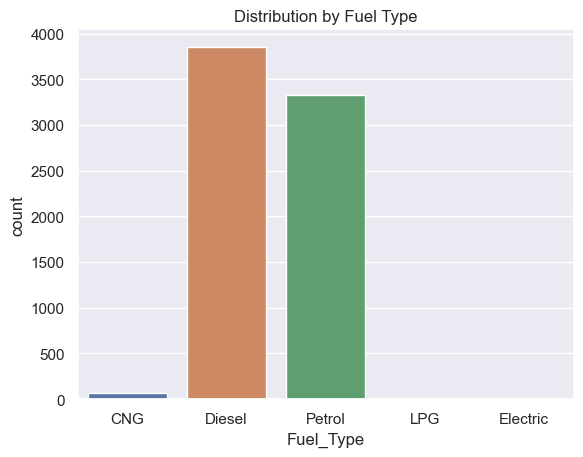

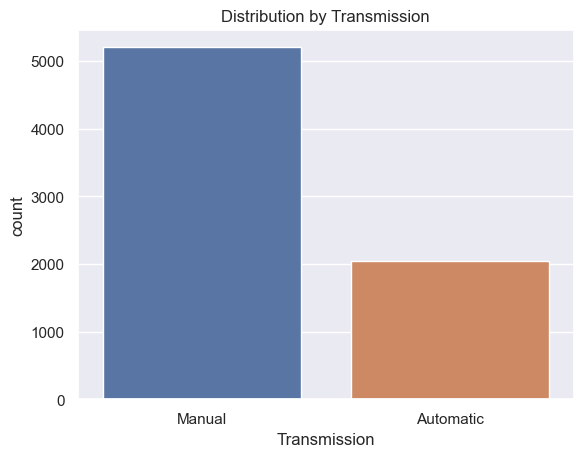

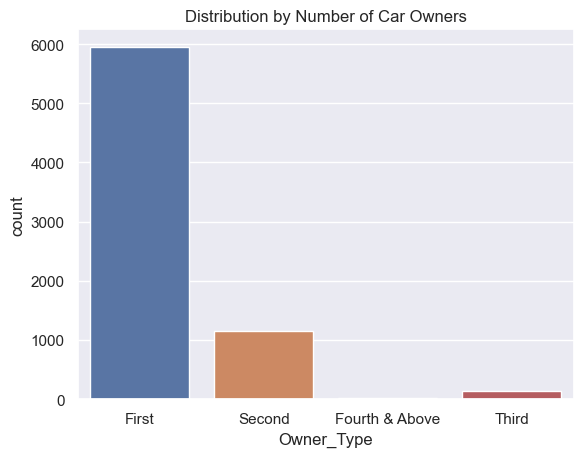

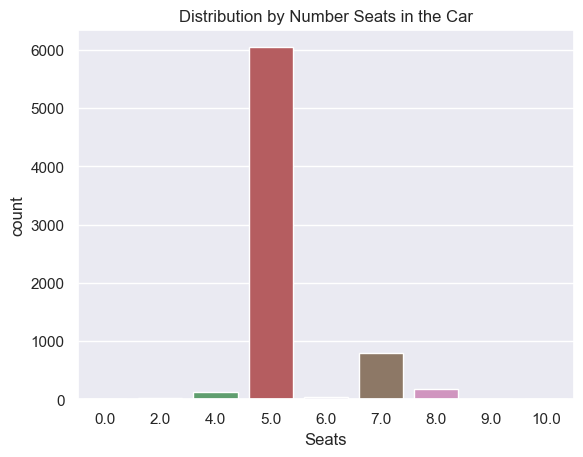

In [27]:
sns.countplot(x='Fuel_Type', data=Data);
plt.title('Distribution by Fuel Type');
plt.show()
sns.countplot(x='Transmission', data=Data);
plt.title('Distribution by Transmission');
plt.show()
sns.countplot(x='Owner_Type', data=Data);
plt.title('Distribution by Number of Car Owners');
plt.show()
sns.countplot(x='Seats', data=Data);
plt.title('Distribution by Number Seats in the Car');
plt.show()

In [28]:
Data.groupby(['Transmission'])[['Transmission']].count()

,Transmission
Transmission,
Automatic,2049
Manual,5204


In [29]:
Data.groupby(['Owner_Type'])[['Owner_Type']].count()

,Owner_Type
Owner_Type,
First,5952
Fourth & Above,12
Second,1152
Third,137


In [30]:
Data.groupby(['Seats'])[['Seats']].count()

,Seats
Seats,
0.0,1
2.0,18
4.0,119
5.0,6047
6.0,38
7.0,796
8.0,170
9.0,3
10.0,8


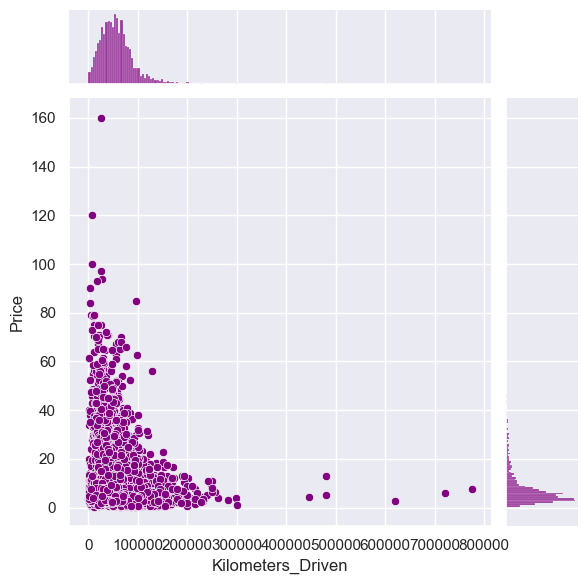

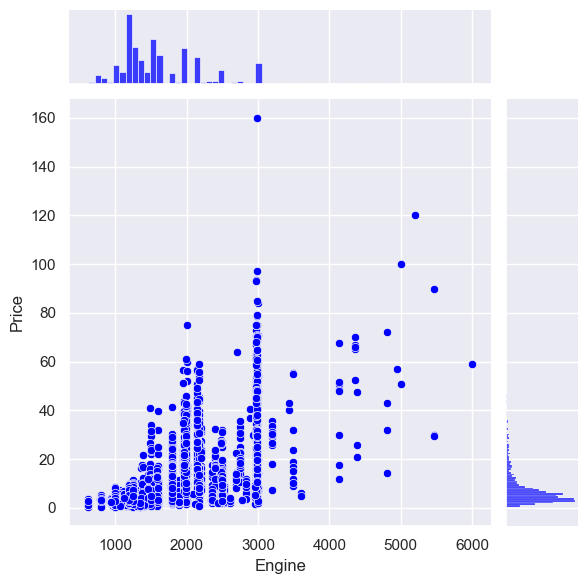

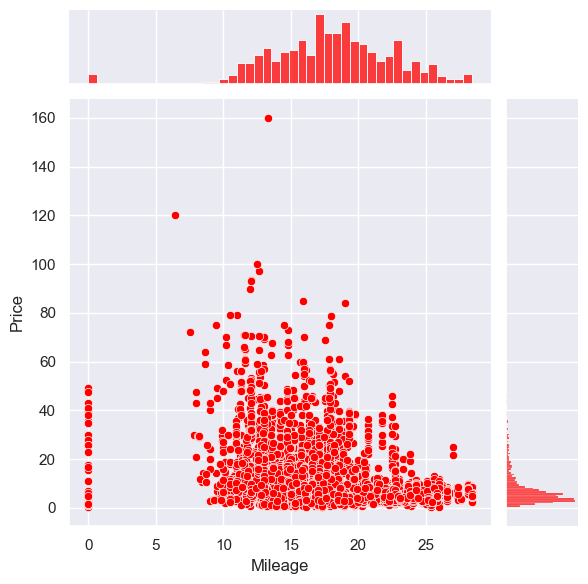

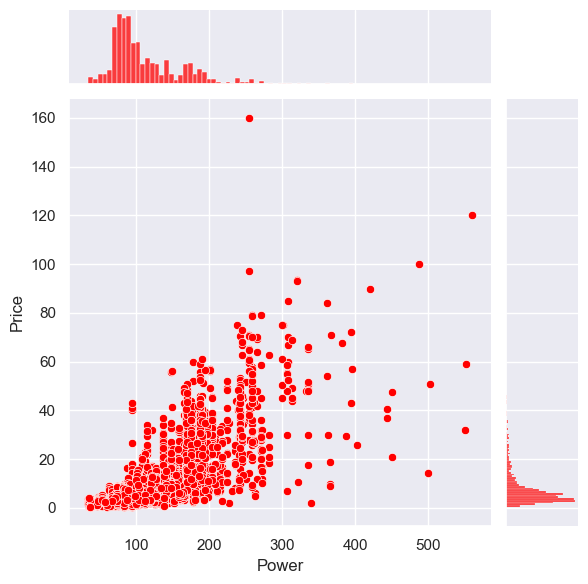

In [103]:
# bivariate joint plots with the relationship of numerical variables with price 

sns.jointplot(x=Data['Kilometers_Driven'], y=Data['Price'],color='purple')
plt.show()

sns.jointplot(x=Data['Engine'], y=Data['Price'],color='blue')
plt.show()

sns.jointplot(x=Data['Mileage'], y=Data['Price'],color='red')
plt.show()

sns.jointplot(x=Data['Power'], y=Data['Price'],color='red')
plt.show()

In [104]:
# correlation matrix

Data.corr(numeric_only=True)

,Kilometers_Driven,Mileage,Engine,Power,Price
Kilometers_Driven,1.000000,-0.146860,0.155058,-0.001146,-0.168788
Mileage,-0.146860,1.000000,-0.585064,-0.491936,-0.304993
Engine,0.155058,-0.585064,1.000000,0.859200,0.656468
Power,-0.001146,-0.491936,0.859200,1.000000,0.769750
Price,-0.168788,-0.304993,0.656468,0.769750,1.000000


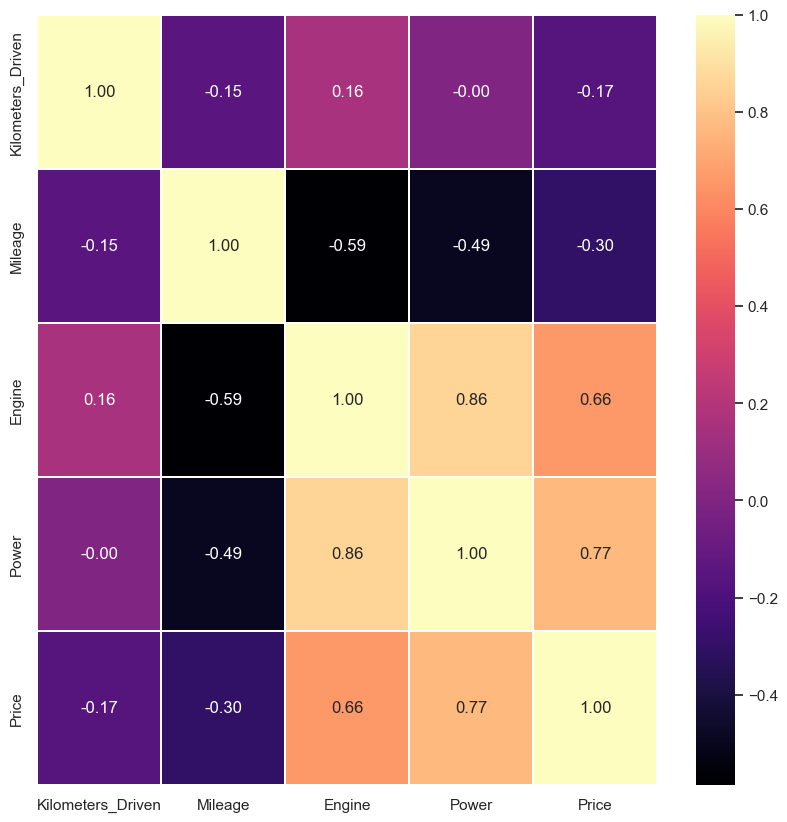

In [101]:
# correlation heatmap

fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Data.corr(numeric_only=True), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show()

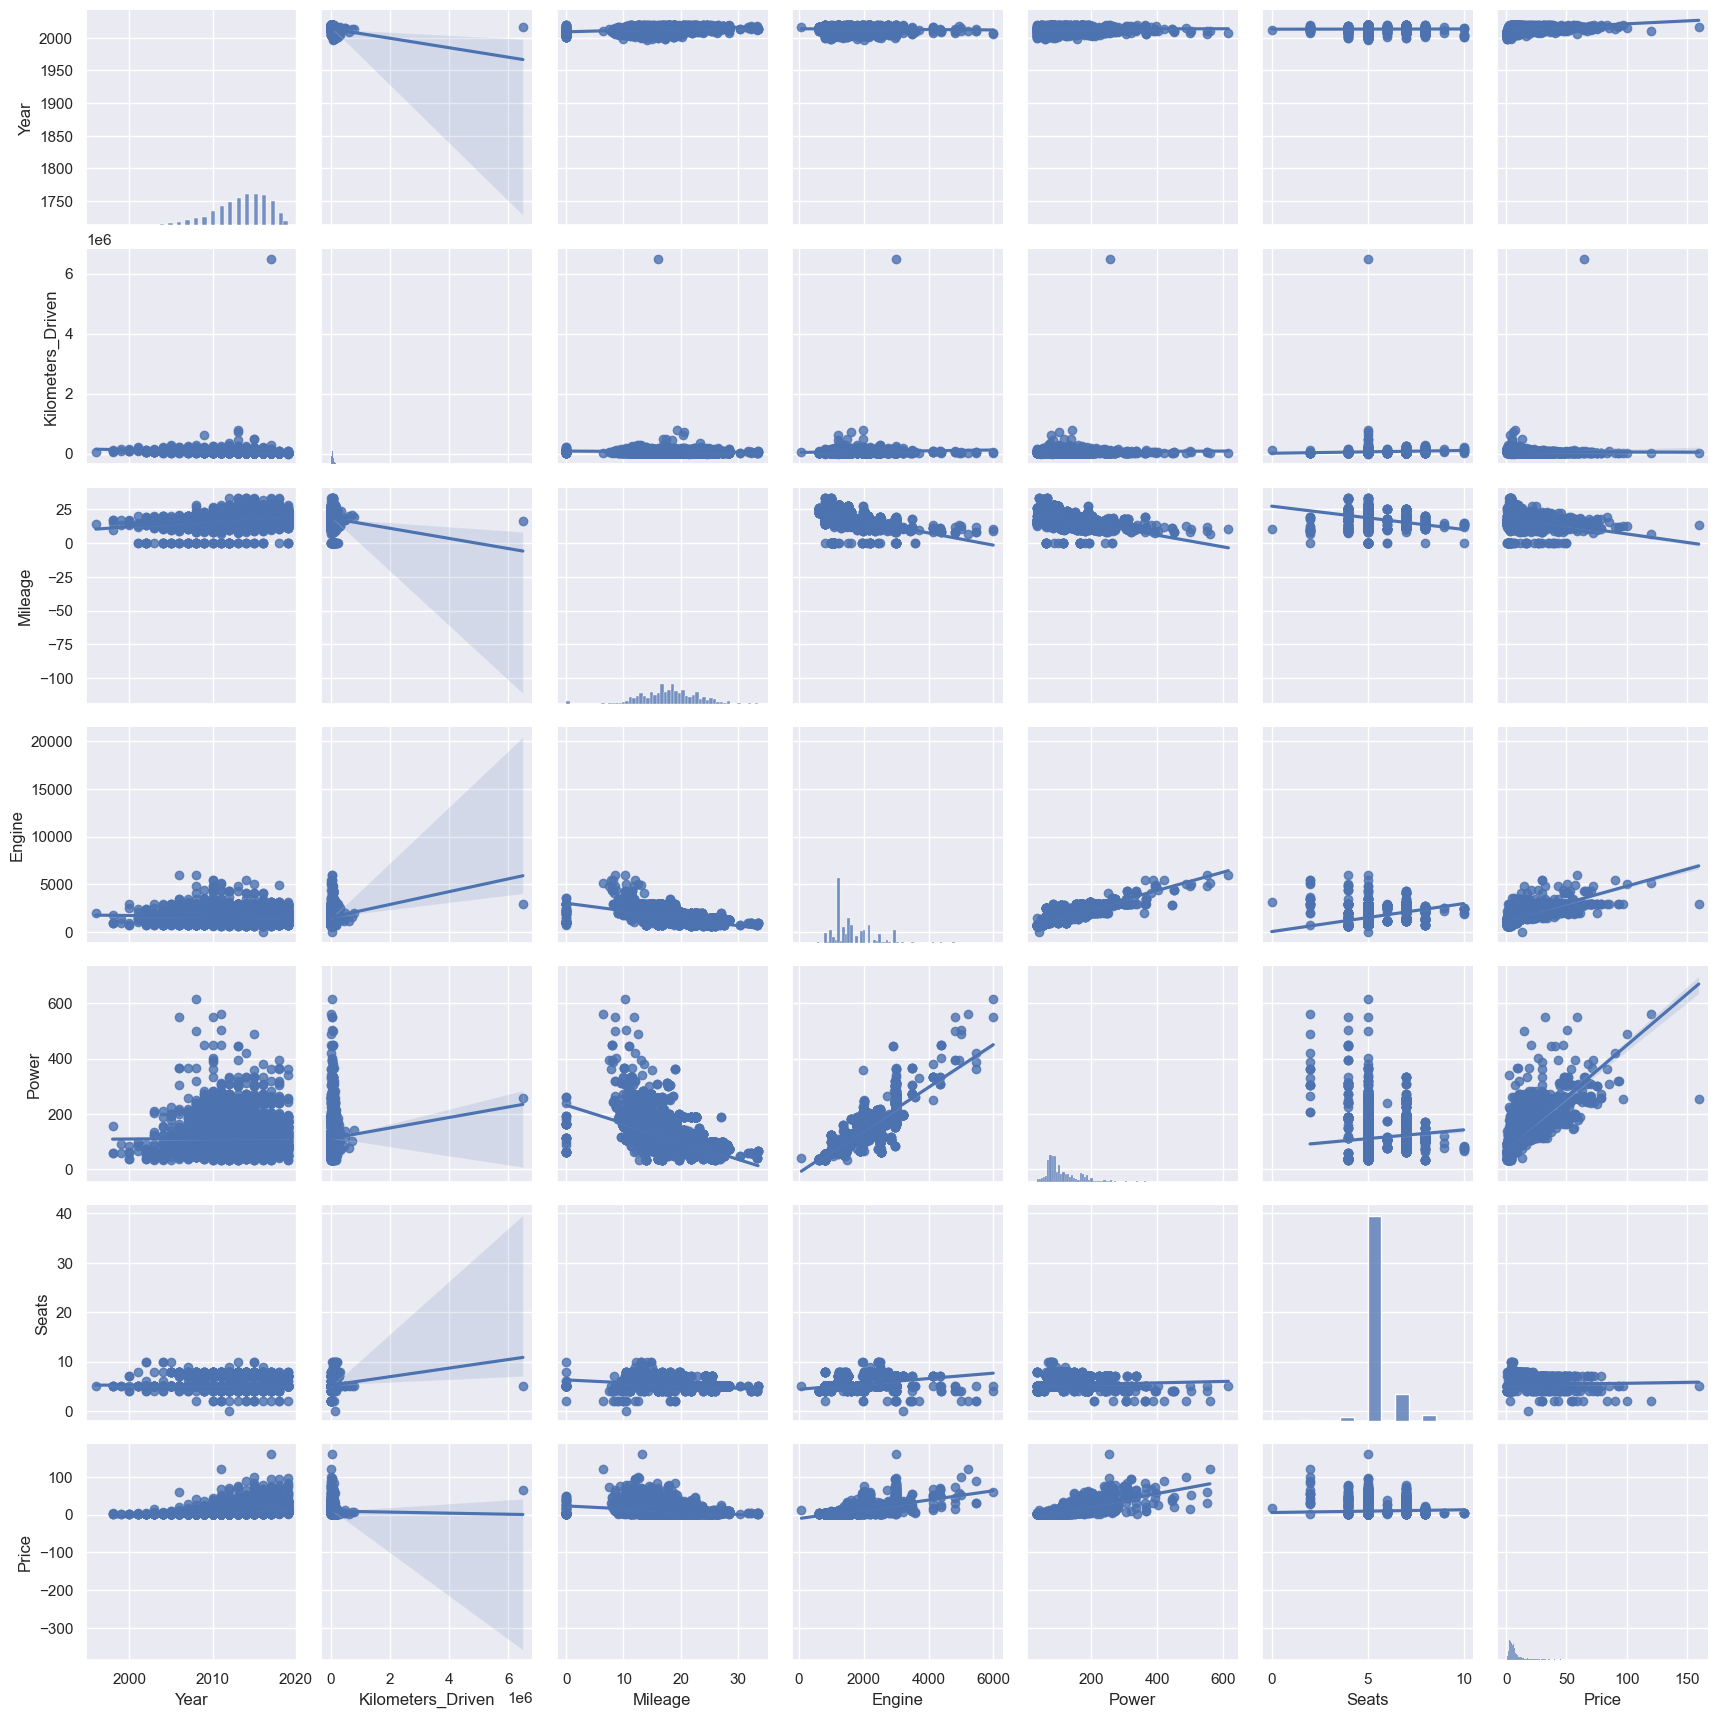

In [34]:
sns.pairplot(Data, kind ="reg")
plt.show()

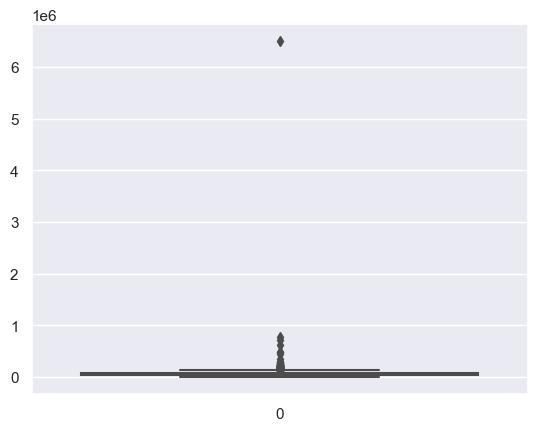

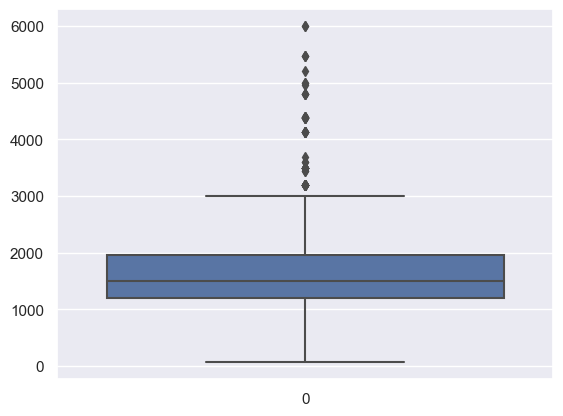

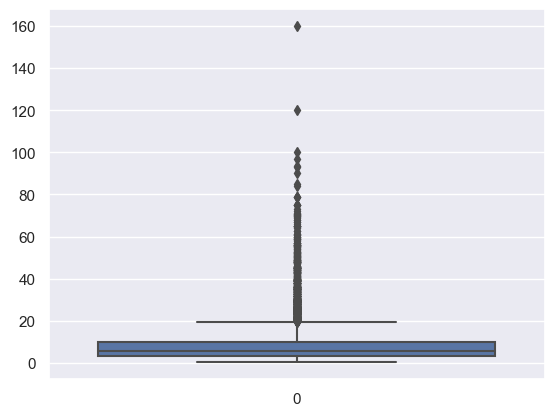

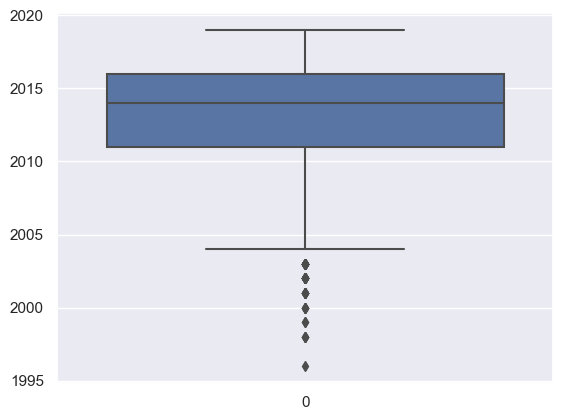

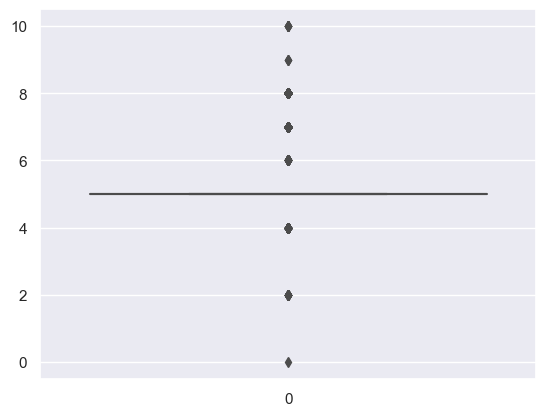

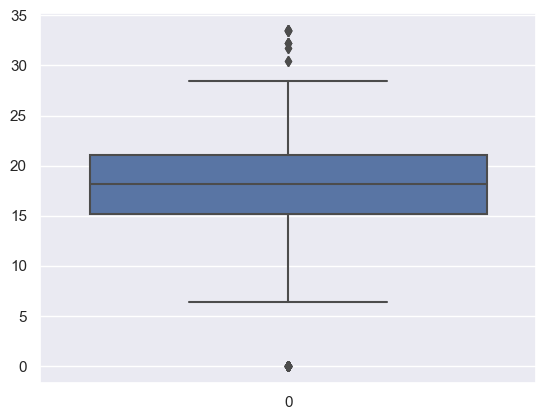

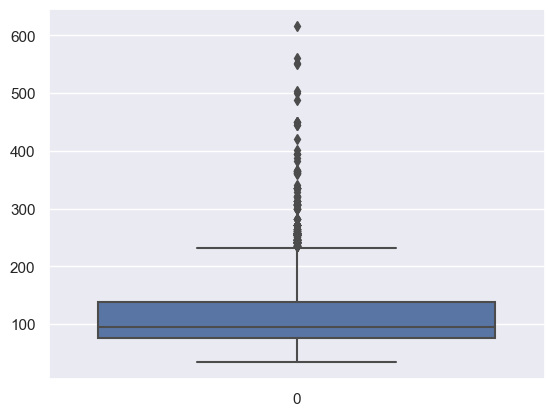

In [35]:
# box plots to show the relationship between two variables 
# Five Number Summary: Min, 25%, 50%, 75%, Max (box plot is a visual representation of the 5 number summary)
# The "whiskers" extend to points that are within 1.5 IQRs of the lower and upper quartile.
# The values (outliers) outside this range are displayed independently. 

# IQR = Q3 (75%) - Q1 (25%)

sns.boxplot(Data['Kilometers_Driven'])
plt.show()

sns.boxplot(Data['Engine'])
plt.show()

sns.boxplot(Data['Price'])
plt.show()

sns.boxplot(Data['Year'])
plt.show()

sns.boxplot(Data['Seats'])
plt.show()

sns.boxplot(Data['Mileage'])
plt.show()

sns.boxplot(Data['Power'])
plt.show()

### <a id = "link7">Investigate Outliers</a>

#### We need to drop or treat the outliers in 'Kilometers_Driven', 'Engine' (size), 'Power', and 'Price' categories.

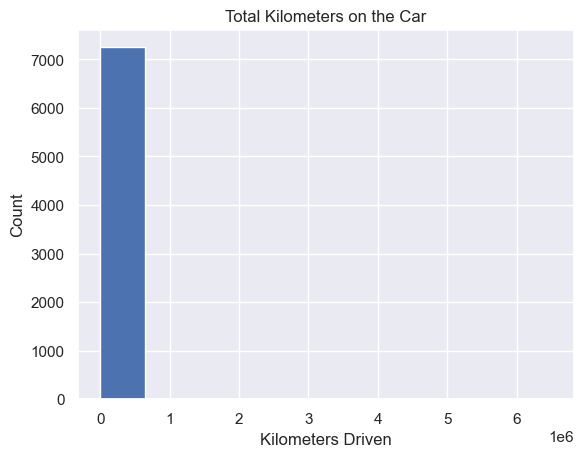

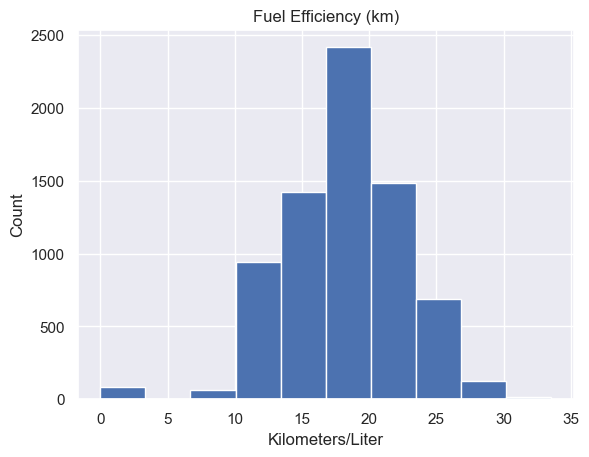

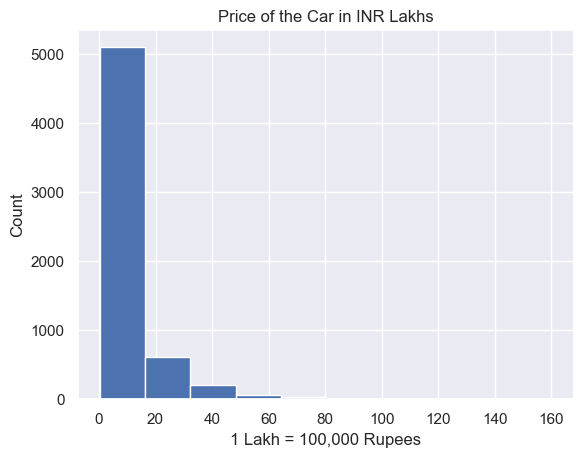

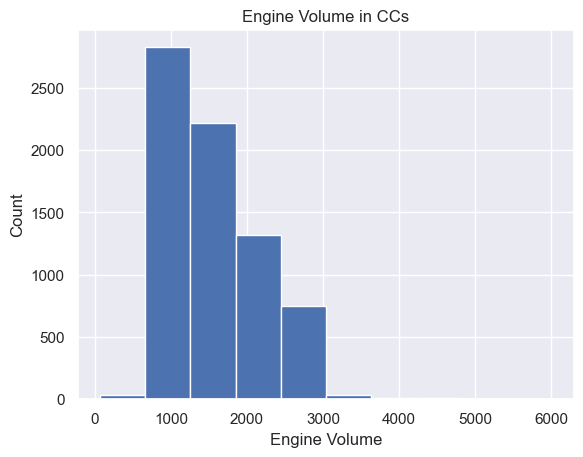

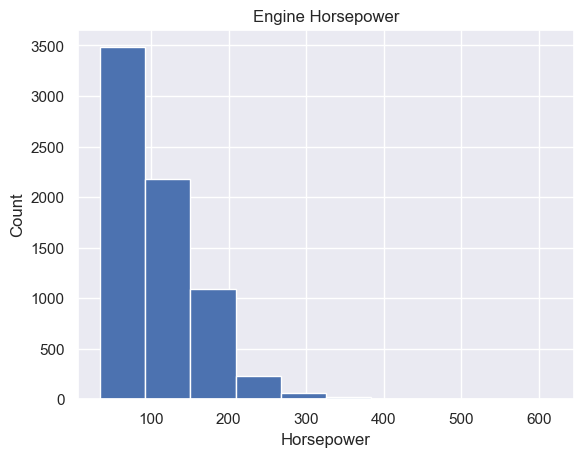

In [36]:
Data.hist('Kilometers_Driven', bins=10);
plt.title('Total Kilometers on the Car');
plt.xlabel('Kilometers Driven');
plt.ylabel('Count');
plt.show()

Data.hist('Mileage', bins=10);
plt.title('Fuel Efficiency (km)');
plt.xlabel('Kilometers/Liter');
plt.ylabel('Count');
plt.show()

Data.hist('Price', bins=10);
plt.title('Price of the Car in INR Lakhs');
plt.xlabel('1 Lakh = 100,000 Rupees');
plt.ylabel('Count');
plt.show()

Data.hist('Engine', bins=10);
plt.title('Engine Volume in CCs');
plt.xlabel('Engine Volume');
plt.ylabel('Count');
plt.show()

Data.hist('Power', bins=10);
plt.title('Engine Horsepower');
plt.xlabel('Horsepower');
plt.ylabel('Count');
plt.show()

#### Outlier Detection: Kilometers Driven

We will first look at how much of the 'Kilometers_Driven' (odometer reading) fall outside of the IQR, focusing on 1.5x the IQR and 4x the IQR. 

In [37]:
quartiles = np.quantile(Data['Kilometers_Driven'][Data['Kilometers_Driven'].notnull()], [.25,.75])
print(quartiles)

[34000. 73000.]


In [38]:
IQR = 73000-34000
outlier_IQR_km = 1.5*(73000-34000)
    
print(IQR)
print(outlier_IQR_km)

39000
58500.0


In [39]:
# IQR LL: 34,000-58,500 = negative
# IQE UL: 73,000+58,500 = 131,500

73000+outlier_IQR_km

131500.0

In [40]:
4*IQR

156000

In [41]:
quartiles = np.quantile(Data['Kilometers_Driven'][Data['Kilometers_Driven'].notnull()], [.25,.75])
km_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {km_4iqr}')
outlier_total_km = Data.loc[np.abs(Data['Kilometers_Driven'] - Data['Kilometers_Driven'].median()) > km_4iqr, 'Kilometers_Driven']
print(outlier_total_km)

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0
29       262000
77       230000
181      216000
340      775000
358      620000
838      215000
1068     225000
1101     248000
1442     231673
1528     299322
1766     220000
1846     255000
1860     720000
1975     282000
2267     215750
2328    6500000
2346     234000
2823     480000
2988     240000
3092     480000
3649     300000
3713     232000
3894     250000
4491     445000
4719     250000
4792     242000
5647     227000
5800     210000
5834     250000
6919     290000
6921     350000
Name: Kilometers_Driven, dtype: int64


We will look at how much of the 'Kilometers_Driven' (odometer reading) fall outside 3x its mean value.

In [42]:
print(Data.Kilometers_Driven.mean())
print(Data.Kilometers_Driven.std())

outlier_cut_off_km = Data.Kilometers_Driven.std() * 3
print(outlier_cut_off_km)

print(Data.Kilometers_Driven.mean() + outlier_cut_off_km)

58699.063146284294
84427.72058265154
253283.1617479546
311982.2248942389


#### Kilometer Outlier Summary:
1.5x the IQR = 131,500, 
4x the IQR = 156,000,
3x the Std Dev of the Mean = 311,982.

The highest value 311,982 is high (193,857 miles), but that's a reasonable cutoff for outlier detection. 

In [43]:
Data[Data['Kilometers_Driven'] > Data.Kilometers_Driven.mean() + outlier_cut_off_km].count()

Name                 8
Location             8
Year                 8
Kilometers_Driven    8
Fuel_Type            8
Transmission         8
Owner_Type           8
Mileage              8
Engine               8
Power                8
Seats                8
Price                7
dtype: int64

#### Engine Outlier Analysis

In [44]:
quartiles = np.quantile(Data['Engine'][Data['Engine'].notnull()], [.25,.75])
print(quartiles)

[1198. 1968.]


In [45]:
IQR = 1968-1198
outlier_IQR_en = 1.5*(1968-1198)
    
print(IQR)
print(outlier_IQR_en)

770
1155.0


In [46]:
print(1198-outlier_IQR_en)
print(1968+outlier_IQR_en)

43.0
3123.0


In [47]:
print(Data.Engine.mean())
print(Data.Engine.std())

outlier_cut_off_en = Data.Engine.std() * 3
print(outlier_cut_off_en)

print(Data.Engine.mean() + outlier_cut_off_en)
print(Data.Engine.mean() - outlier_cut_off_en)

1616.5734702372692
595.2851369164354
1785.855410749306
3402.428880986575
-169.28194051203673


In [48]:
Data[Data['Engine'] > Data.Engine.mean() + outlier_cut_off_en].count()

Name                 48
Location             48
Year                 48
Kilometers_Driven    48
Fuel_Type            48
Transmission         48
Owner_Type           48
Mileage              48
Engine               48
Power                46
Seats                48
Price                44
dtype: int64

#### Power Outlier Analysis

In [49]:
quartiles = np.quantile(Data['Power'][Data['Power'].notnull()], [.25,.75])
print(quartiles)

[ 75.  138.1]


In [50]:
IQR = 138.03-77
outlier_IQR_pwr = 1.5*(138.03-77)
    
print(IQR)
print(outlier_IQR_pwr)

61.03
91.545


In [51]:
print(77-outlier_IQR_pwr)
print(138.03+outlier_IQR_pwr)

-14.545000000000002
229.575


In [52]:
print(Data.Power.mean())
print(Data.Power.std())

outlier_cut_off_pwr = Data.Power.std() * 3
print(outlier_cut_off_pwr)

print(Data.Power.mean() + outlier_cut_off_pwr)
print(Data.Power.mean() - outlier_cut_off_pwr)

112.76521404351512
53.49355313410433
160.480659402313
273.2458734458281
-47.71544535879788


In [53]:
Data[Data['Power'] > Data.Power.mean() + outlier_cut_off_pwr].count()

Name                 73
Location             73
Year                 73
Kilometers_Driven    73
Fuel_Type            73
Transmission         73
Owner_Type           73
Mileage              73
Engine               73
Power                73
Seats                73
Price                64
dtype: int64

### <a id = "link8">Address Outliers</a>

#### Upon further research and verification, we have the following findings and recommendations: 

Data in the ‘Kilometers_Driven’ seems feasible, except for one observation where there are 6.5 million kilometers on the car. That would be a world record by a longshot. I will remove that row.

Data in the ‘Engine’ column also seems OK. The high and low values align with horsepower (e.g., the Bentley has 5,998 CC) and reconcile with what I found online. I will not drop any rows on that basis.

Data in the ‘Power’ column is fine. The "outlier" horsepower values are indeed correct. For example, the 'Bentley Flying Spur W12' actually has a V12 engine with over 600 hp. Given my verification, I will not drop any rows on the basis of high (or low) horsepower. 

Data in the ‘Mileage’ column has issues. There are 82 rows with 0.0 hp, which is obviously incorrect. I will replace the 0.0 values with the median hp.

The missing values in the 'Price' column remains problematic. That is our dependent variable and imputing over 1,000 missing values with the median or another measure would influence our modeling results. We will replace with median values of similar vehicles or drop the rows with missing values. Both will be tested first in the regression.

In [54]:
# Drop the outliers with total kilometers on the car that's obviously an error. 

Data.drop(Data[Data['Kilometers_Driven'] > 1000000].index, inplace = True)

In [55]:
Data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7252.000000,7252.000000,7250.00000,7206.000000,7077.000000,7199.000000,6018.000000
mean,2013.364865,57810.852868,18.14188,1616.382459,112.744692,5.279761,9.470243
std,3.254365,37499.537277,4.56244,595.105530,53.469461,0.811709,11.165926
min,1996.000000,171.000000,0.00000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,34000.000000,15.17000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,53404.000000,18.16000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,73000.000000,21.10000,1968.000000,138.100000,5.000000,9.950000
max,2019.000000,775000.000000,33.54000,5998.000000,616.000000,10.000000,160.000000


#### Fill in Mileage Missing Values with Median

In [56]:
Data.Engine.fillna(Data.Engine.median(),inplace=True)

In [57]:
Data.Mileage.fillna(Data.Mileage.median(),inplace=True)

In [58]:
Data.Power.fillna(Data.Power.median(),inplace=True)

In [59]:
Data['Seats'].fillna(Data.Seats.median(), inplace = True)  

In [60]:
Data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,6018.000000
mean,2013.364865,57810.852868,18.141885,1615.599835,112.292359,5.277716,9.470243
std,3.254365,37499.537277,4.561811,593.295744,52.898565,0.809088,11.165926
min,1996.000000,171.000000,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,34000.000000,15.170000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,53404.000000,18.160000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,73000.000000,21.100000,1968.000000,138.030000,5.000000,9.950000
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,160.000000


#### Summary: Treat Missing Calues and Outliers - NEED TO UPDATE NARRATIVE

1.	53 rows where ‘Seats’ is missing (imputed with the median)
2.	1 row where ‘Seats’ is zero (imputed with the median)
3.	1 row where ‘Kilometers_Driven’ is an outlier (dropped the observation from the dataset)
4.	1,234 rows where ‘Price’ (our dependent variable) is missing (dropped the observations from the dataset)

Similar to 'Mileage', 'Engine', and 'Power', the proportion of missing (or zero) values in the 'Seats' column is very small - well below 1%.

To be consistent, we applied the 'Seats' median to these rows. Further, we will later group 'Seats' into two categories for our regression analysis. 

### <a id = "link9">Process Categorical Variables</a>

In [61]:
Data.groupby(['Location'])[['Location']].count() 

,Location
Location,
Ahmedabad,275
Bangalore,440
Chennai,590
Coimbatore,772
Delhi,660
Hyderabad,876
Jaipur,499
Kochi,772
Kolkata,654


In [62]:
Data.groupby(['Owner_Type'])[['Owner_Type']].count() 

,Owner_Type
Owner_Type,
First,5951
Fourth & Above,12
Second,1152
Third,137


In [63]:
Data.groupby(['Transmission'])[['Transmission']].count() 

,Transmission
Transmission,
Automatic,2048
Manual,5204


In [64]:
Data.groupby(['Year'])[['Year']].count() 

,Year
Year,
1996,1
1998,4
1999,2
2000,5
2001,8
2002,18
2003,20
2004,35
2005,68


#### Group the Cars into Bins by Year.

New Cars: Year Model 2018 and 2019; 
Slightly Older Cars, likely still under warranty: 2015-2017; 
Cars 5-10 Years Old; 
Cars More than 10 Years Old.

In [65]:
binned_yr = pd.cut(Data['Year'], [-np.inf, 2008, 2014, 2017, np.inf])
binned_yr

0       (2008.0, 2014.0]
1       (2014.0, 2017.0]
2       (2008.0, 2014.0]
3       (2008.0, 2014.0]
4       (2008.0, 2014.0]
              ...       
7248    (2008.0, 2014.0]
7249    (2014.0, 2017.0]
7250    (2008.0, 2014.0]
7251    (2008.0, 2014.0]
7252    (2008.0, 2014.0]
Name: Year, Length: 7252, dtype: category
Categories (4, interval[float64, right]): [(-inf, 2008.0] < (2008.0, 2014.0] < (2014.0, 2017.0] < (2017.0, inf]]

In [66]:
binned_yr.value_counts(dropna=False)

Year
(2008.0, 2014.0]    3644
(2014.0, 2017.0]    2523
(-inf, 2008.0]       605
(2017.0, inf]        480
Name: count, dtype: int64

In [67]:
# can add custom labels
Data['year_bin'] = pd.cut(
    Data['Year'], [-np.inf, 2008, 2014, 2017, np.inf], 
    labels = ["Before 2009", "2009-2014", "2015-2017", "2018-2019"]
)
Data.drop(['Year'], axis=1, inplace=True)
Data['year_bin'].value_counts(dropna=False)

year_bin
2009-2014      3644
2015-2017      2523
Before 2009     605
2018-2019       480
Name: count, dtype: int64

#### Group the Cars into Bins by No. of Seats.

Small-to-Mid Size Cars: 5 or fewer seats
Large Vehicles: More than 5 seats

In [68]:
binned_seats = pd.cut(Data['Seats'], [-np.inf, 5, np.inf])
binned_seats

0       (-inf, 5.0]
1       (-inf, 5.0]
2       (-inf, 5.0]
3        (5.0, inf]
4       (-inf, 5.0]
           ...     
7248    (-inf, 5.0]
7249    (-inf, 5.0]
7250    (-inf, 5.0]
7251    (-inf, 5.0]
7252    (-inf, 5.0]
Name: Seats, Length: 7252, dtype: category
Categories (2, interval[float64, right]): [(-inf, 5.0] < (5.0, inf]]

In [69]:
binned_seats.value_counts(dropna=False)

Seats
(-inf, 5.0]    6237
(5.0, inf]     1015
Name: count, dtype: int64

In [70]:
# can add custom labels
Data['seat_bin'] = pd.cut(
    Data['Seats'], [-np.inf, 5, np.inf], 
    labels = ["5 or Fewer Seats", "More than 5 Seats"]
)
Data.drop(['Seats'], axis=1, inplace=True)
Data['seat_bin'].value_counts(dropna=False)

seat_bin
5 or Fewer Seats     6237
More than 5 Seats    1015
Name: count, dtype: int64

#### Group the Cars into Bins by No. of Owners.

One Ownwer
More than One Owner

In [71]:
print(Data.Owner_Type.unique())
print(Data.Owner_Type.nunique())

['First' 'Second' 'Fourth & Above' 'Third']
4


In [72]:
# Create grouping variable for owner

Data.loc[Data.Owner_Type == "Fourth & Above", "Owner_Type"] = "Second or More"
Data.loc[Data.Owner_Type == "Third", "Owner_Type"] = "Second or More"
Data.loc[Data.Owner_Type == "Second", "Owner_Type"] = "Second or More"

In [73]:
# Generate make and model fields
# Note: this is imperfect because of Land Rover - will need to correct for those

Data['Model'] = Data['Name'].apply(lambda x: ' '.join(x.split()[:2]))
Data['Make'] = Data['Name'].apply(lambda x: ' '.join(x.split()[:1]))

Data["Make"].replace({"Land": "Land Rover", "Smart": "Smart Car"}, inplace=True)

In [74]:
print(Data.Make.unique())
print(Data.Make.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini'
 'Fiat' 'Jeep' 'Smart Car' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


#### Group Fuel_Type into Bins

In [75]:
print(Data.Fuel_Type.unique())
print(Data.Fuel_Type.nunique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
5


Since only 1% of the dataset includes a fuel type that is CSG, LPG, or Electic, and those three are quite different from each other, we will exclude them from the dataset.

We will bin into Diesel and Petrol. 

In [76]:
Data.drop(Data[Data['Fuel_Type'] == "CNG"].index,inplace=True)

In [77]:
Data.drop(Data[Data['Fuel_Type'] == "LPG"].index,inplace=True)

In [78]:
Data.drop(Data[Data['Fuel_Type'] == "Electric"].index,inplace=True)

In [79]:
Data.groupby(['Fuel_Type'])[['Fuel_Type']].count() 

,Fuel_Type
Fuel_Type,
Diesel,3851
Petrol,3325


#### Make and Model Findings and Assumptions

There are more 30 different car makes and over 220 car models, based upon online research of the cars in the data file. 

Nearly all can be classified into one of three categories:
1.	Hatchback/Station Wagon
2.	Sedan/Coupe
3.	SUV/Crossover

Pricing for SUV/Crossover vehicle types can be different, but we will account for that with the 'Seats' variable. 

While there is a very small number of vehicles classified as a Sports Car, Minivan, or Truck (~12 in total), a more intuitive differentiator (other than 'Seats' to reflect size) is whether the car is a luxury brand or not. 

In [80]:
# List of luxury cars for assignment in Class variable

luxury = ('Audi','Bentley','BMW','Jaguar','Lamborghini','Land', 'Mercedes-Benz', 'Porsche','Volvo')
luxury

('Audi',
 'Bentley',
 'BMW',
 'Jaguar',
 'Lamborghini',
 'Land',
 'Mercedes-Benz',
 'Porsche',
 'Volvo')

In [81]:
Data.loc[Data['Make'].isin(luxury),'Class'] = 'Luxury'
Data['Class'].fillna('Economy', inplace=True)

In [82]:
Data.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price
count,7176.000000,7176.000000,7176.000000,7176.000000,5950.000000
mean,57848.748606,18.077850,1621.301421,112.801440,9.536867
std,37626.450545,4.493203,593.282836,52.919951,11.209791
min,171.000000,0.000000,624.000000,34.200000,0.440000
25%,34000.000000,15.140000,1198.000000,78.900000,3.500000
50%,53366.000000,18.150000,1493.000000,94.000000,5.685000
75%,73000.000000,21.030000,1968.000000,138.030000,10.000000
max,775000.000000,28.400000,5998.000000,616.000000,160.000000


### <a id = "link10">Preparation for Modeling</a>

#### Data Dictionary Update

1.	Serial Number (S.No.) – dropped from the dataset.
2.	Car Name (Name) – first converted to Make and Model for classification into Class and Size then dropped along with Make and Model.
3.	Car Location (Location) – remains in the dataset; converted to a dummy variable.
4.	Model Year (Year) – remains in the dataset; binned then converted to a dummy variable.
5.	Total Mileage on the Car (Kilometers Driven) – remains in the data set as a numeric variable.
6.	Fuel Type (Fuel_Type) – remains in the dataset, except for CNG, LPG, and Electric; converted to a dummy variable.
7.	Transmission (Transmission) – remains in the dataset; converted to a dummy variable.
8.	Number of Owners (Owner_Type) - remains in the dataset; binned then converted to a dummy variable.
9.	Fuel Efficiency (Mileage) – remains in the dataset as a numeric variable.
10.	Engine Volume (Engine) – remains in the dataset as a numeric variable. 
11.	Engine Horsepower (Power) – remains in the dataset as a numeric variable. 
12.	Number of Seats (Seats) – remains in the dataset; binned then converted to a dummy variable.
13.	Price of a New Car (New_Price) – dropped from the dataset.
14.	Price of a Used Car (Price) – remains in the dataset as a numeric variable. 


#### Drop Columns that are No Longer Necessary

We will drop the original 'Name' column since we've mapped them to car 'Class' by the make, and the 'Seats' helps to differentiate the model.

We will drop the original 'Make' column since we've binned them and create a new column with the bins.

We will drop the original 'Model' column since we've binned them and create a new column with the bins.

The original 'Seats' and 'Year' column has been replaced with new binned columns. 

In [83]:
Data.drop(['Name'], axis=1, inplace=True)

In [84]:
Data.drop(['Make'], axis=1, inplace=True)

In [85]:
Data.drop(['Model'], axis=1, inplace=True)

In [86]:
Data.dropna(inplace = True)     #drop all rows that have any NaN values ('Price' column)

We also need to drop one variable from each category. 

Otherwise, the VIF test will show perfect correlation between two independent variables ("inf"). 

In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. 

To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

In [87]:
Data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,year_bin,seat_bin,Class
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,2015-2017,5 or Fewer Seats,Economy
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,2009-2014,5 or Fewer Seats,Economy
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,2009-2014,More than 5 Seats,Economy
4,Coimbatore,40670,Diesel,Automatic,Second or More,15.20,1968.0,140.80,17.74,2009-2014,5 or Fewer Seats,Luxury
6,Jaipur,86999,Diesel,Manual,First,23.08,1461.0,63.10,3.50,2009-2014,5 or Fewer Seats,Economy


In [88]:
Data.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,57688.684034,18.064677,1626.488908,113.325390,9.536867
std,38023.282340,4.511691,599.399690,53.305253,11.209791
min,171.000000,0.000000,624.000000,34.200000,0.440000
25%,33948.250000,15.100000,1198.000000,78.900000,3.500000
50%,53000.000000,18.120000,1493.000000,94.000000,5.685000
75%,73000.000000,21.027500,1984.000000,138.100000,10.000000
max,775000.000000,28.400000,5998.000000,560.000000,160.000000


In [89]:
Data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,year_bin,seat_bin,Class
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,2015-2017,5 or Fewer Seats,Economy
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,2009-2014,5 or Fewer Seats,Economy
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,2009-2014,More than 5 Seats,Economy
4,Coimbatore,40670,Diesel,Automatic,Second or More,15.20,1968.0,140.80,17.74,2009-2014,5 or Fewer Seats,Luxury
6,Jaipur,86999,Diesel,Manual,First,23.08,1461.0,63.10,3.50,2009-2014,5 or Fewer Seats,Economy


In [90]:
Data.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Price                0
year_bin             0
seat_bin             0
Class                0
dtype: int64

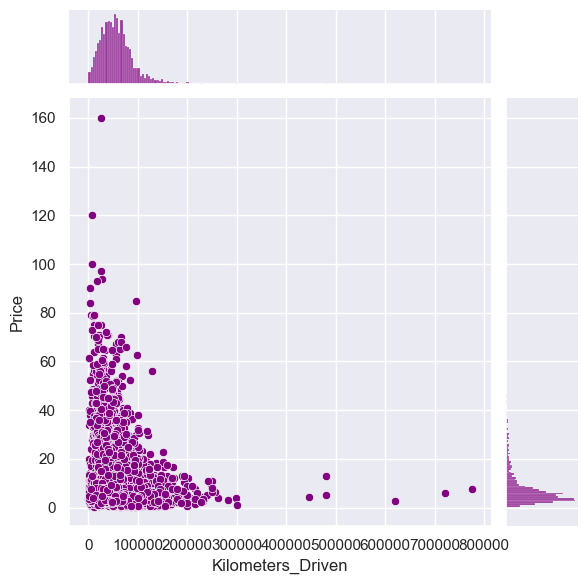

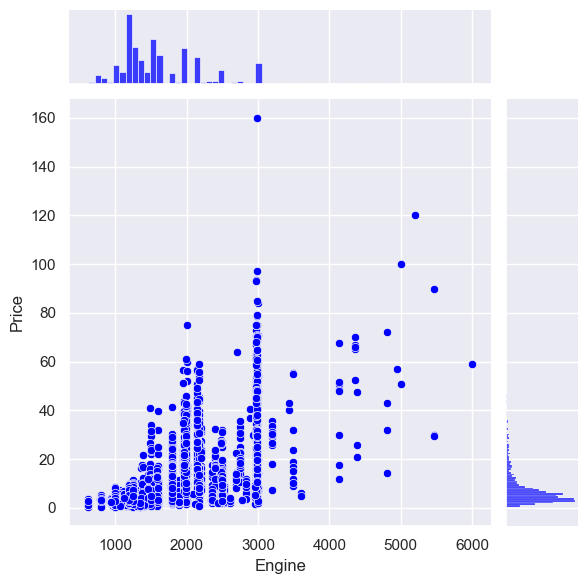

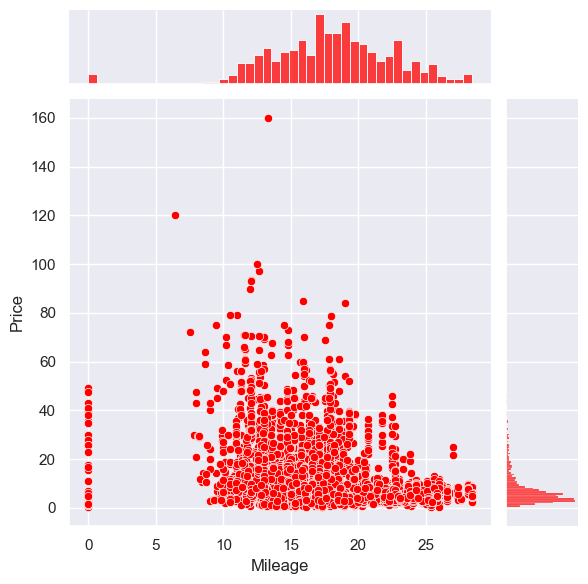

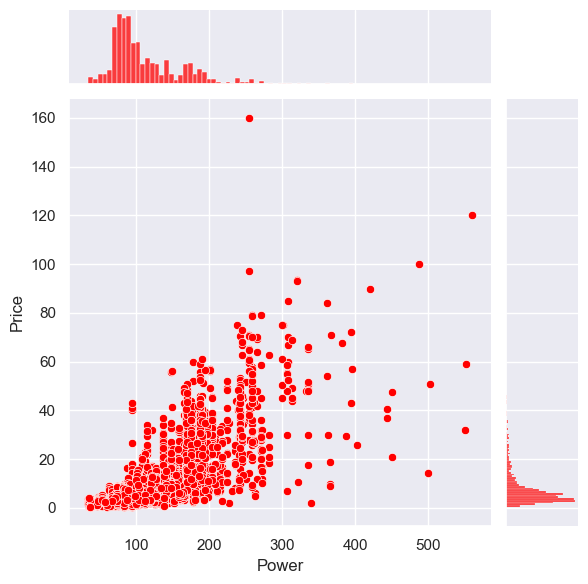

In [94]:
# bivariate joint plots with the relationship of numerical variables with price 

sns.jointplot(x= Data['Kilometers_Driven'], y = Data['Price'],color='purple')
plt.show()

sns.jointplot(x = Data['Engine'], y = Data['Price'],color='blue')
plt.show()

sns.jointplot(x = Data['Mileage'], y = Data['Price'],color='red')
plt.show()

sns.jointplot(x = Data['Power'], y = Data['Price'],color='red')
plt.show()

In [100]:
# correlation matrix

Data.corr(numeric_only=True)

,Kilometers_Driven,Mileage,Engine,Power,Price
Kilometers_Driven,1.000000,-0.146860,0.155058,-0.001146,-0.168788
Mileage,-0.146860,1.000000,-0.585064,-0.491936,-0.304993
Engine,0.155058,-0.585064,1.000000,0.859200,0.656468
Power,-0.001146,-0.491936,0.859200,1.000000,0.769750
Price,-0.168788,-0.304993,0.656468,0.769750,1.000000


In [95]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5950 non-null   object  
 1   Kilometers_Driven  5950 non-null   int64   
 2   Fuel_Type          5950 non-null   object  
 3   Transmission       5950 non-null   object  
 4   Owner_Type         5950 non-null   object  
 5   Mileage            5950 non-null   float64 
 6   Engine             5950 non-null   float64 
 7   Power              5950 non-null   float64 
 8   Price              5950 non-null   float64 
 9   year_bin           5950 non-null   category
 10  seat_bin           5950 non-null   category
 11  Class              5950 non-null   object  
dtypes: category(2), float64(4), int64(1), object(5)
memory usage: 523.3+ KB


In [98]:
Data.corr(numeric_only=True)

,Kilometers_Driven,Mileage,Engine,Power,Price
Kilometers_Driven,1.000000,-0.146860,0.155058,-0.001146,-0.168788
Mileage,-0.146860,1.000000,-0.585064,-0.491936,-0.304993
Engine,0.155058,-0.585064,1.000000,0.859200,0.656468
Power,-0.001146,-0.491936,0.859200,1.000000,0.769750
Price,-0.168788,-0.304993,0.656468,0.769750,1.000000


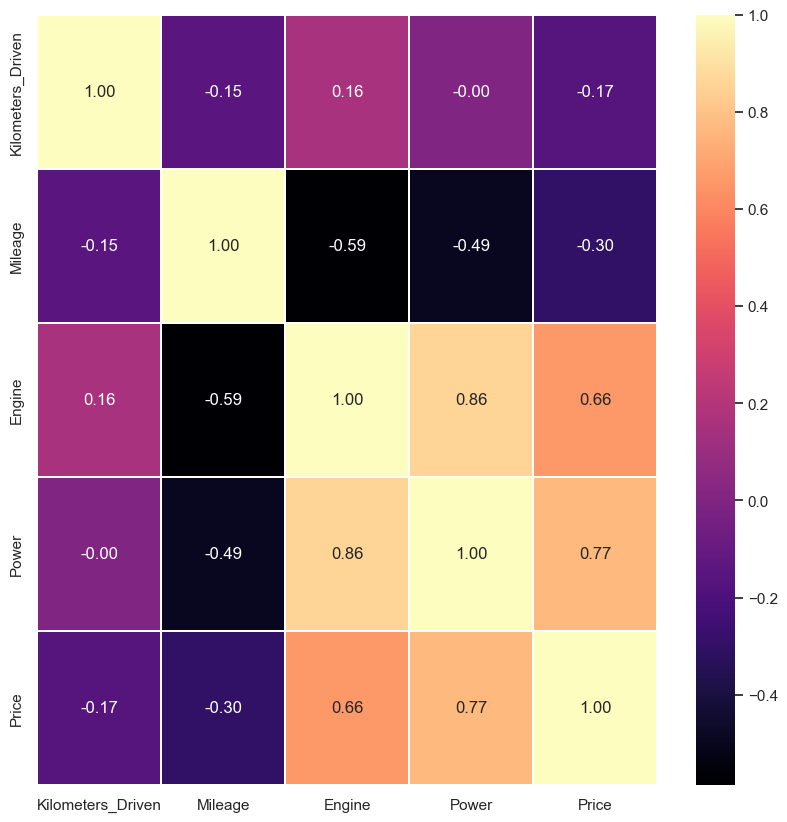

In [99]:
# correlation heatmap

fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Data.corr(numeric_only=True), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show()

### <a id = "link11">Regression Analysis: Model Training/Development</a>

#### Create Dummy Variables with Categorical Data

In [105]:
Data = pd.get_dummies(Data, columns=['Location'])
Data = pd.get_dummies(Data, columns=['Transmission'])
Data = pd.get_dummies(Data, columns=['Owner_Type'])
Data = pd.get_dummies(Data, columns=['year_bin'])
Data = pd.get_dummies(Data, columns=['Fuel_Type'])
Data = pd.get_dummies(Data, columns=['Class'])
Data = pd.get_dummies(Data, columns=['seat_bin'])

Data.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,year_bin_Before 2009,year_bin_2009-2014,year_bin_2015-2017,year_bin_2018-2019,Fuel_Type_Diesel,Fuel_Type_Petrol,Class_Economy,Class_Luxury,seat_bin_5 or Fewer Seats,seat_bin_More than 5 Seats
1,41000,19.67,1582.0,126.20,12.50,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
2,46000,18.20,1199.0,88.70,4.50,False,False,True,False,False,...,False,True,False,False,False,True,True,False,True,False
3,87000,20.77,1248.0,88.76,6.00,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,True
4,40670,15.20,1968.0,140.80,17.74,False,False,False,True,False,...,False,True,False,False,True,False,False,True,True,False
6,86999,23.08,1461.0,63.10,3.50,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False


#### We will first split the dependent variable, Price, from the independent variables. 

#### We will then split the dataset into a training/development dataset and a testing/validation dataset. 

In [106]:
#Defining X and y variables
X = Data.drop(['Price'], axis=1)
y = Data[['Price']]

In [107]:
# This adds the constant term beta0 to the Linear Regression.
X_con=sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.30 , random_state=1)

### Add-on: **Use StatsModels for perform the regression**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [114]:
np.asarray(y_trainc).dtype
np.asarray(X_trainc).dtype

dtype('O')

In [116]:
X_con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 1 to 6018
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       5950 non-null   float64
 1   Kilometers_Driven           5950 non-null   int64  
 2   Mileage                     5950 non-null   float64
 3   Engine                      5950 non-null   float64
 4   Power                       5950 non-null   float64
 5   Location_Ahmedabad          5950 non-null   bool   
 6   Location_Bangalore          5950 non-null   bool   
 7   Location_Chennai            5950 non-null   bool   
 8   Location_Coimbatore         5950 non-null   bool   
 9   Location_Delhi              5950 non-null   bool   
 10  Location_Hyderabad          5950 non-null   bool   
 11  Location_Jaipur             5950 non-null   bool   
 12  Location_Kochi              5950 non-null   bool   
 13  Location_Kolkata            5950 non-n

In [117]:
olsmod0 = sm.OLS(y_trainc, X_trainc.astype(float))
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     455.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:20:34   Log-Likelihood:                -13492.
No. Observations:                4165   AIC:                         2.703e+04
Df Residuals:                    4142   BIC:                         2.718e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Life expectancy deceases with their increase.
- Positive values of coefficient shows that, Life expectancy inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 


#### Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

##### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 1 to 6018
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kilometers_Driven           5950 non-null   int64  
 1   Mileage                     5950 non-null   float64
 2   Engine                      5950 non-null   float64
 3   Power                       5950 non-null   float64
 4   Location_Ahmedabad          5950 non-null   bool   
 5   Location_Bangalore          5950 non-null   bool   
 6   Location_Chennai            5950 non-null   bool   
 7   Location_Coimbatore         5950 non-null   bool   
 8   Location_Delhi              5950 non-null   bool   
 9   Location_Hyderabad          5950 non-null   bool   
 10  Location_Jaipur             5950 non-null   bool   
 11  Location_Kochi              5950 non-null   bool   
 12  Location_Kolkata            5950 non-null   bool   
 13  Location_Mumbai             5950 non-n

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif_series1 = pd.Series([variance_inflation_factor(X.values.astype(float),i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

# there is moderate multi-colinearity with Engine and Power

Series before feature selection: 

Kilometers_Driven             1.513427
Mileage                       2.476094
Engine                        8.316003
Power                         7.282091
Location_Ahmedabad                 inf
Location_Bangalore                 inf
Location_Chennai                   inf
Location_Coimbatore                inf
Location_Delhi                     inf
Location_Hyderabad                 inf
Location_Jaipur                    inf
Location_Kochi                     inf
Location_Kolkata                   inf
Location_Mumbai                    inf
Location_Pune                      inf
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol             

In [125]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_trainc.drop('Power', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values.astype(float),i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.481453
Mileage                       2.468411
Engine                        3.461757
Location_Ahmedabad                 inf
Location_Bangalore                 inf
Location_Chennai                   inf
Location_Coimbatore                inf
Location_Delhi                     inf
Location_Hyderabad                 inf
Location_Jaipur                    inf
Location_Kochi                     inf
Location_Kolkata                   inf
Location_Mumbai                    inf
Location_Pune                      inf
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol             

VIF has been reduced, let's check the regression fit again. 

In [126]:
olsmod1 = sm.OLS(y_trainc, X_train2.astype(float))
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     402.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:23:40   Log-Likelihood:                -13737.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4143   BIC:                         2.766e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Now let's drop variables with a p-value > 5%

In [128]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train3 = X_train2.drop('Location_Chennai', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values.astype(float),i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.481453
Mileage                       2.468411
Engine                        3.461757
Location_Ahmedabad            1.390428
Location_Bangalore            1.682800
Location_Coimbatore           2.166158
Location_Delhi                1.987869
Location_Hyderabad            2.206953
Location_Jaipur               1.750628
Location_Kochi                2.190405
Location_Kolkata              1.953314
Location_Mumbai               2.322450
Location_Pune                 1.991213
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                

In [129]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod2 = sm.OLS(y_trainc, X_train3.astype(float))
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     402.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:24:27   Log-Likelihood:                -13737.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4143   BIC:                         2.766e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [130]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train4 = X_train3.drop('Location_Jaipur', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values.astype(float),i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.481449
Mileage                       2.468388
Engine                        3.458633
Location_Ahmedabad            1.200574
Location_Bangalore            1.355071
Location_Coimbatore           1.639066
Location_Delhi                1.508954
Location_Hyderabad            1.602301
Location_Kochi                1.662614
Location_Kolkata              1.509999
Location_Mumbai               1.702964
Location_Pune                 1.485434
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                      inf
Class_Luxury                 

In [131]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod3 = sm.OLS(y_trainc, X_train4.astype(float))
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:24:42   Log-Likelihood:                -13737.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4144   BIC:                         2.765e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [132]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train5 = X_train4.drop('Location_Delhi', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values.astype(float),i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.465272
Mileage                       2.467378
Engine                        3.445906
Location_Ahmedabad            1.109458
Location_Bangalore            1.196131
Location_Coimbatore           1.380409
Location_Hyderabad            1.329820
Location_Kochi                1.403358
Location_Kolkata              1.286145
Location_Mumbai               1.386312
Location_Pune                 1.267600
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats    

In [133]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod4 = sm.OLS(y_trainc, X_train5.astype(float))
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:26:49   Log-Likelihood:                -13738.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4145   BIC:                         2.764e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [134]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train6 = X_train5.drop('Location_Pune', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values.astype(float),i) for i in range(X_train6.shape[1])],index=X_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.464578
Mileage                       2.466720
Engine                        3.443745
Location_Ahmedabad            1.073049
Location_Bangalore            1.128021
Location_Coimbatore           1.277108
Location_Hyderabad            1.214195
Location_Kochi                1.300252
Location_Kolkata              1.203755
Location_Mumbai               1.259686
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats   

In [135]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod5 = sm.OLS(y_trainc, X_train6.astype(float))
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     468.9
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:26:55   Log-Likelihood:                -13739.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4146   BIC:                         2.764e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [136]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train7 = X_train6.drop('Location_Kochi', axis=1)
vif_series7 = pd.Series([variance_inflation_factor(X_train7.values.astype(float),i) for i in range(X_train7.shape[1])],index=X_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.459813
Mileage                       2.465861
Engine                        3.443351
Location_Ahmedabad            1.048380
Location_Bangalore            1.093353
Location_Coimbatore           1.161082
Location_Hyderabad            1.148857
Location_Kolkata              1.144852
Location_Mumbai               1.172196
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [695]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod6 = sm.OLS(y_trainc, X_train7.astype(float))
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     496.4
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -13739.
No. Observations:                4165   AIC:                         2.751e+04
Df Residuals:                    4147   BIC:                         2.763e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [137]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train8 = X_train7.drop('Location_Ahmedabad', axis=1)
vif_series8 = pd.Series([variance_inflation_factor(X_train8.values.astype(float),i) for i in range(X_train8.shape[1])],index=X_train8.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series8))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.454216
Mileage                       2.465558
Engine                        3.443329
Location_Bangalore            1.082648
Location_Coimbatore           1.145829
Location_Hyderabad            1.130097
Location_Kolkata              1.129816
Location_Mumbai               1.153136
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
Owner_Type_Second or More          inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [138]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod7 = sm.OLS(y_trainc, X_train8.astype(float))
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     527.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:03   Log-Likelihood:                -13740.
No. Observations:                4165   AIC:                         2.751e+04
Df Residuals:                    4148   BIC:                         2.762e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [139]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train9 = X_train8.drop('Owner_Type_Second or More', axis=1)
vif_series9 = pd.Series([variance_inflation_factor(X_train8.values.astype(float),i) for i in range(X_train9.shape[1])],index=X_train9.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series9))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.454216
Mileage                       2.465558
Engine                        3.443329
Location_Bangalore            1.082648
Location_Coimbatore           1.145829
Location_Hyderabad            1.130097
Location_Kolkata              1.129816
Location_Mumbai               1.153136
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First                   inf
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Diesel                   inf
Fuel_Type_Petrol                   inf
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [140]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod8 = sm.OLS(y_trainc, X_train9.astype(float))
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     527.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:05   Log-Likelihood:                -13740.
No. Observations:                4165   AIC:                         2.751e+04
Df Residuals:                    4148   BIC:                         2.762e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [141]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train10 = X_train9.drop('Fuel_Type_Diesel', axis=1)
vif_series10 = pd.Series([variance_inflation_factor(X_train10.values.astype(float),i) for i in range(X_train10.shape[1])],index=X_train10.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series10))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.454216
Mileage                       2.465558
Engine                        3.443329
Location_Bangalore            1.082648
Location_Coimbatore           1.145829
Location_Hyderabad            1.130097
Location_Kolkata              1.129816
Location_Mumbai               1.153136
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First              1.182946
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Petrol              1.943612
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [142]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod9 = sm.OLS(y_trainc, X_train10.astype(float))
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     527.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:10   Log-Likelihood:                -13740.
No. Observations:                4165   AIC:                         2.751e+04
Df Residuals:                    4148   BIC:                         2.762e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [143]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train11 = X_train10.drop('Mileage', axis=1)
vif_series11 = pd.Series([variance_inflation_factor(X_train11.values.astype(float),i) for i in range(X_train11.shape[1])],index=X_train11.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series11))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.447401
Engine                        2.562021
Location_Bangalore            1.081731
Location_Coimbatore           1.144197
Location_Hyderabad            1.130078
Location_Kolkata              1.129636
Location_Mumbai               1.152828
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First              1.181407
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Petrol              1.443004
Class_Economy                      inf
Class_Luxury                       inf
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [144]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod10 = sm.OLS(y_trainc, X_train11.astype(float))
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:14   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [145]:
# we drop the one with the "inf" VIF values and check the Adjusted-R Squared
X_train12 = X_train11.drop('Class_Economy', axis=1)
vif_series12 = pd.Series([variance_inflation_factor(X_train12.values.astype(float),i) for i in range(X_train12.shape[1])],index=X_train12.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series12))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.447401
Engine                        2.562021
Location_Bangalore            1.081731
Location_Coimbatore           1.144197
Location_Hyderabad            1.130078
Location_Kolkata              1.129636
Location_Mumbai               1.152828
Transmission_Automatic             inf
Transmission_Manual                inf
Owner_Type_First              1.181407
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Petrol              1.443004
Class_Luxury                  2.168918
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [146]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod11 = sm.OLS(y_trainc, X_train12.astype(float))
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:18   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [147]:
X_train13 = X_train12.drop('Transmission_Automatic', axis=1)
vif_series13 = pd.Series([variance_inflation_factor(X_train13.values.astype(float),i) for i in range(X_train13.shape[1])],index=X_train13.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series13))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.447401
Engine                        2.562021
Location_Bangalore            1.081731
Location_Coimbatore           1.144197
Location_Hyderabad            1.130078
Location_Kolkata              1.129636
Location_Mumbai               1.152828
Transmission_Manual           1.934870
Owner_Type_First              1.181407
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Petrol              1.443004
Class_Luxury                  2.168918
seat_bin_5 or Fewer Seats          inf
seat_bin_More than 5 Seats         inf
dtype: float64



In [148]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod12 = sm.OLS(y_trainc, X_train13.astype(float))
olsres12 = olsmod12.fit()
print(olsres12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:22   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [149]:
X_train14 = X_train13.drop('seat_bin_5 or Fewer Seats', axis=1)
vif_series14 = pd.Series([variance_inflation_factor(X_train14.values.astype(float),i) for i in range(X_train14.shape[1])],index=X_train14.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series14))

Series before feature selection: 

const                         0.000000
Kilometers_Driven             1.447401
Engine                        2.562021
Location_Bangalore            1.081731
Location_Coimbatore           1.144197
Location_Hyderabad            1.130078
Location_Kolkata              1.129636
Location_Mumbai               1.152828
Transmission_Manual           1.934870
Owner_Type_First              1.181407
year_bin_Before 2009               inf
year_bin_2009-2014                 inf
year_bin_2015-2017                 inf
year_bin_2018-2019                 inf
Fuel_Type_Petrol              1.443004
Class_Luxury                  2.168918
seat_bin_More than 5 Seats    1.691780
dtype: float64



In [150]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod13 = sm.OLS(y_trainc, X_train14.astype(float))
olsres13 = olsmod13.fit()
print(olsres13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:24   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [151]:
# we drop the one with the "inf" VIF values and check the Adjusted-R Squared

X_train15 = X_train14.drop('year_bin_2015-2017', axis=1)
vif_series15 = pd.Series([variance_inflation_factor(X_train15.values.astype(float),i) for i in range(X_train15.shape[1])],index=X_train15.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series15))

Series before feature selection: 

const                         41.130368
Kilometers_Driven              1.447401
Engine                         2.562021
Location_Bangalore             1.081731
Location_Coimbatore            1.144197
Location_Hyderabad             1.130078
Location_Kolkata               1.129636
Location_Mumbai                1.152828
Transmission_Manual            1.934870
Owner_Type_First               1.181407
year_bin_Before 2009           1.490493
year_bin_2009-2014             1.439529
year_bin_2018-2019             1.177989
Fuel_Type_Petrol               1.443004
Class_Luxury                   2.168918
seat_bin_More than 5 Seats     1.691780
dtype: float64



In [176]:
#VIF still looks good, let's test the regression fit then continue removing variables whose p-value > 5%

olsmod14 = sm.OLS(y_trainc, X_train15.astype(float))
olsres14 = olsmod14.fit()
print(olsres14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:34:34   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [153]:
# rename our final model to "final_model"
final_model = olsres14
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:27:26   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.2787      0.653     -1.959      0.050      -2.559       0.001
Kilometers_Driven          -3.346e-05   3.14e-06    -10.664      0.000   -3.96e-05   -2.73e-05
Engine                         0.0096      0.000     35.651      0.000       0.009       0.010
Location_Bangalore             1.9405      0.433      4.482      0.000       1.092       2.789
Location_Coimbatore            1.7780      0.355      5.004      0.000       1.081       2.475
Location_Hyderabad             1.6900      0.328      5.154      0.000       1.047       2.333
Location_Kolkata              -1.3201      0.386     -3.420      0.001      -2.077      -0.563
Location_Mumbai               -1.0934      0.327     -3.345      0.001      -1.734      -0.452
Transmission_Manual           -2.6812      0.313     -8.561      0.000      -3.295      -2.067
Owner_Type_First               0.7981      0.285      2.799      0.005       0.239       1.357
year_bin_Before 2009          -6.7921      0.449    -15.124      0.000      -7.673      -5.912
year_bin_2009-2014            -4.3852      0.244    -17.948      0.000      -4.864      -3.906
year_bin_2018-2019             3.1657      0.441      7.175      0.000       2.301       4.031
Fuel_Type_Petrol              -0.6570      0.245     -2.681      0.007      -1.137      -0.176
Class_Luxury                   8.8558      0.421     21.041      0.000       8.031       9.681
seat_bin_More than 5 Seats    -2.3717      0.376     -6.303      0.000      -3.109      -1.634
==============================================================================
Omnibus:                     3904.060   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508301.962
Skew:                           4.055   Prob(JB):                         0.00
Kurtosis:                      56.509   Cond. No.                     4.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now, no feature has p value greater than 5%, so we'll consider the variables in "X_train15" as the final ones and "olsres14" as the final model.

#### Observations
The Adjusted R-squared is 0.669. The model is able to explain 66.9% of variance, which shows model is good.
The Adjusted-R squared in original model it was 70.6% (where we considered all the variables). This shows that the variables we dropped were not affecting the model much.

### <a id = "link12">Regression Analysis: Model Testing/Validation</a>

#### Now we'll check rest of the assumptions on the final model
1.	Mean of residuals should be near 0
2.	Linearity of variables
3.	Normality of error terms
4.	No Heteroscedacity

In [154]:
residual= olsres14.resid
np.mean(residual)

-4.068842368540863e-13

#### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [155]:
residual=olsres14.resid
fitted=olsres14.fittedvalues #predicted values

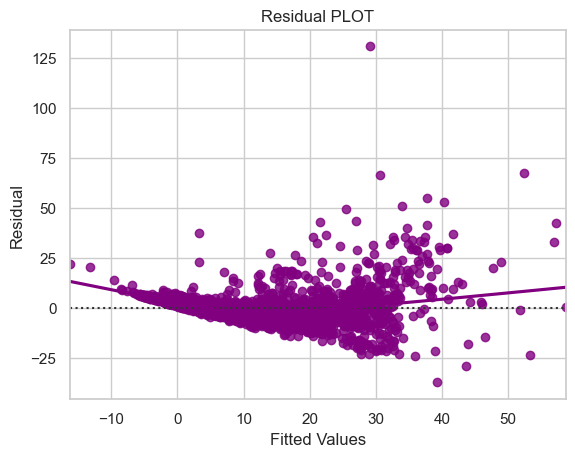

In [157]:
sns.set_style("whitegrid")
sns.residplot(x=fitted,y=residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

#### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

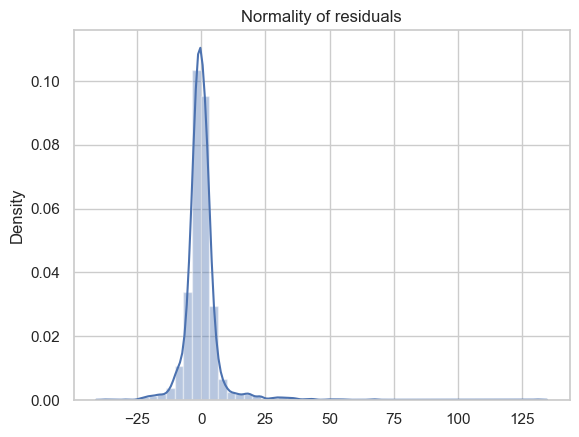

In [158]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

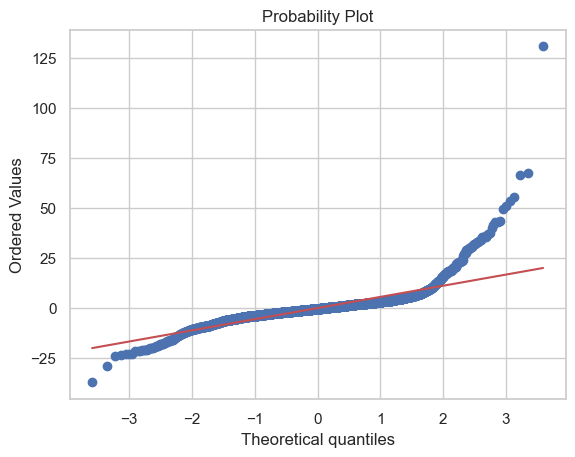

In [159]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [160]:
stats.shapiro(residual)

ShapiroResult(statistic=0.7257732152938843, pvalue=0.0)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

#### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

##### Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

##### Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [162]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train15.astype(float))
lzip(name, test)

[('F statistic', 0.7616079010174222), ('p-value', 0.9999999996782777)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

#### Now we have checked all the assumptions and they are satisfied, we can move towards prediction with the test dataset. 

In [163]:
X_train15.dtypes

const                         float64
Kilometers_Driven               int64
Engine                        float64
Location_Bangalore               bool
Location_Coimbatore              bool
Location_Hyderabad               bool
Location_Kolkata                 bool
Location_Mumbai                  bool
Transmission_Manual              bool
Owner_Type_First                 bool
year_bin_Before 2009             bool
year_bin_2009-2014               bool
year_bin_2018-2019               bool
Fuel_Type_Petrol                 bool
Class_Luxury                     bool
seat_bin_More than 5 Seats       bool
dtype: object

In [164]:
final_X = X_train15.columns.tolist()

# Selecting columns from test data that we used to create our final model

final_X

['const',
 'Kilometers_Driven',
 'Engine',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Kolkata',
 'Location_Mumbai',
 'Transmission_Manual',
 'Owner_Type_First',
 'year_bin_Before 2009',
 'year_bin_2009-2014',
 'year_bin_2018-2019',
 'Fuel_Type_Petrol',
 'Class_Luxury',
 'seat_bin_More than 5 Seats']

In [165]:
final_X = ['Kilometers_Driven', 'Engine', 'Location_Bangalore',
       'Location_Coimbatore', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Transmission_Manual', 'Owner_Type_First',
       'year_bin_Before 2009', 'year_bin_2009-2014', 'year_bin_2018-2019',
       'Fuel_Type_Petrol', 'Class_Luxury', 'seat_bin_More than 5 Seats']

final_X

['Kilometers_Driven',
 'Engine',
 'Location_Bangalore',
 'Location_Coimbatore',
 'Location_Hyderabad',
 'Location_Kolkata',
 'Location_Mumbai',
 'Transmission_Manual',
 'Owner_Type_First',
 'year_bin_Before 2009',
 'year_bin_2009-2014',
 'year_bin_2018-2019',
 'Fuel_Type_Petrol',
 'Class_Luxury',
 'seat_bin_More than 5 Seats']

In [167]:
X_test_final = X_testc[final_X]

In [168]:
X_test_final.head()

,Kilometers_Driven,Engine,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Transmission_Manual,Owner_Type_First,year_bin_Before 2009,year_bin_2009-2014,year_bin_2018-2019,Fuel_Type_Petrol,Class_Luxury,seat_bin_More than 5 Seats
3896,130000,1248.0,False,False,True,False,False,True,True,False,True,False,False,False,False
5804,69140,1461.0,False,False,False,False,False,True,True,False,True,False,False,False,False
2438,110000,1248.0,False,False,True,False,False,True,True,False,True,False,False,False,False
1535,65000,1498.0,False,False,True,False,False,True,True,False,True,False,False,False,False
5761,55662,2967.0,False,True,False,False,False,False,True,False,False,False,False,True,True


In [169]:
y_pred = olsres14.predict(X_train15)

y_pred

334      0.920989
4366     8.620119
1689    29.627444
2974     4.338549
5077      4.74112
          ...    
912       0.80304
5252     17.30566
4030     6.702262
238     10.352457
5217     6.213779
Length: 4165, dtype: object

In [180]:
y_trainc.info()
y_testc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4165 entries, 334 to 5217
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   4165 non-null   float64
dtypes: float64(1)
memory usage: 65.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1785 entries, 3896 to 5176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1785 non-null   float64
dtypes: float64(1)
memory usage: 27.9 KB


In [ ]:
olsmod14 = sm.OLS(y_trainc, X_train15.astype(float))
olsres14 = olsmod14.fit()
print(olsres14.summary())

In [183]:
final_model = sm.OLS(y_trainc,X_train15.astype(float)).fit()
print(final_model.summary())


olsmod14 = sm.OLS(y_trainc, X_train15.astype(float))
olsres14 = olsmod14.fit()
print(olsres14.summary())


X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.30 , random_state=1)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     561.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:38:09   Log-Likelihood:                -13742.
No. Observations:                4165   AIC:                         2.752e+04
Df Residuals:                    4149   BIC:                         2.762e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Checking the root mean squared error (RMSE) on both train and test set  

In [185]:
residual=final_model.resid
fitted=final_model.fittedvalues #predicted values

In [189]:
rms = np.sqrt(mean_squared_error(y_trainc, fitted))
print('Train error:',rms)

# rms1 = np.sqrt(mean_squared_error(y_testc, fitted))
# print('Test error:',rms1)

Train error: 6.556759493216116


#### Check the mean absolute error (RMSE) on both train and test set

In [ ]:
# Mean Absolute Error on test
mean_absolute_error(y_trainc, X_train15)

### <a id = "link13">Conclusions</a>

## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.85**, which is good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-114.81**

3. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).